In [1]:
import pickle, os
def combine_pkl_files_to_one(dir_name, delete = True):
    ret = {}
    for file_name in os.listdir(dir_name):
        if file_name =="full.pkl":
            continue
        file_path = os.path.join(dir_name, file_name)
        ret[file_name] = pickle.load(open(file_path,"rb"))

        if delete:
            os.remove(file_path)

    pickle.dump(ret, open(f"{dir_name}/full.pkl","wb"))


def extract_pkl_files_from_one(dir_name, delete = True):
    path = f"{dir_name}/full.pkl"
    if not os.path.exists(path):return
    files = pickle.load(open(path,"rb"))

    for file_name, file in files.items():
        if file_name =="full.pkl":
            continue
        file_path = os.path.join(dir_name, file_name)
        pickle.dump(file, open(file_path,"wb"))
    
    if delete:
        os.remove(f"{dir_name}/full.pkl")


In [14]:
from modelzipper.tutils import *
import matplotlib.pyplot as plt
import numpy as np
import os
from pprint import pprint
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# nltk.download('punkt')
# nltk.download('stopwords')

# 英文停用词
stop_words = set(stopwords.words('english'))


context_length = "12k"
file_dir = f"/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/{int(context_length[:-1])*1000-100}/ce"
 
# file_dir = "/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal/Meta-Llama-3.1-8B-Instruct/1900/ce"
# context_length = "2k"
# file_dir = f"/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal_max12k_sample200_gws/Meta-Llama-3.1-8B-Instruct/{max(int(context_length[:-1])*1000-100,0)}/label"
# print(file_dir)
# file_dir = f"/data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/information_flow_normal_max12k_sample200_gws/Meta-Llama-3.1-8B-Instruct/{max(0, int(context_length[:-1])*1000-100)}/label"
file_dir = f"/data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/gws/Meta-Llama-3.1-8B-Instruct/{max(0, int(context_length[:-1])*1000-100)}/label"
print(file_dir)
prefix = "3-hop*"
all_files = auto_read_dir(file_dir, file_prefix=prefix)
i = 0
all_files = [os.path.join(file_dir, x) for x in all_files]
len(all_files)
# all_files[0]

ModelZipper is ready for launch🚀 | Current Version🦄 >>> 0.2.7 <<< | AOE Time🕒 2025-01-23 22:43:27


2025-01-23 18:43:28.385 | INFO     | modelzipper.tutils:auto_read_dir:371 - number of files with prefix '3-hop*' and suffix '': 495


/data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/gws/Meta-Llama-3.1-8B-Instruct/11900/label


495

In [3]:
tokenizer = AutoTokenizer.from_pretrained("/data/hf_models/Meta-Llama-3.1-8B-Instruct")
input_context ="wr adsf"

iret = tokenizer(input_context, add_special_tokens= False, return_tensors='pt')['input_ids']

ret = tokenizer.apply_chat_template([{ "role": "user", "content": input_context}], tokenize=True, add_generation_prompt=True, return_tensors='pt')

In [4]:
print(iret)
print(ret[0, 30:])

tensor([[19239, 14058,    69]])
tensor([ 19239,  14058,     69, 128009, 128006,  78191, 128007,    271])


In [5]:
def random_combine(ref:list, att:list, return_snd_pos = False):

    att_list =[[] for _ in range(len(ref) + 1)]
    for p_att in att[:-1]:
        att_list[random.randint(0,len(ref)-1)].append(p_att)
    att_list[-1].append(att[-1])

    results = [k for k in att_list[0]]

    if return_snd_pos:
        insert_pos = list(range(len(results)))
    for r, patt in zip(ref,att_list[1:]):
        results.append(r)
        if return_snd_pos:
            insert_pos.extend(list(range(len(results), len(results) + len(patt))))

        results.extend(patt)
            
    if return_snd_pos:
        assert len(att) == len(insert_pos)
        return results, insert_pos

    return results


random_combine([1,2,3],['a',[1,2,3]],return_snd_pos = True)

(['a', 1, 2, 3, [1, 2, 3]], [0, 4])

In [6]:
single_data = auto_read_data(all_files[-1])

single_data['embedding']['score']#.keys()

begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/gws/Meta-Llama-3.1-8B-Instruct/11900/label/3-hop_sid-36_pid-1_1-3-5-9.pkl | file size: 2.05 KB | file type: pkl


KeyError: 'score'

In [14]:
single_data = auto_read_data(all_files[-1])

# (single_data['embedding']['grad']['score'],

# single_data['embedding']['weight']['score'],
# single_data['embedding']['saliency']['score'])

begin to read data from /data/zecheng/acl2025/SaliencyResults/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/3-hop_sid-6_pid-0_1-2-3-9.pkl | file size: 826.0 B | file type: pkl


KeyError: 'grad'

100%|██████████| 495/495 [00:00<00:00, 23815.69it/s]


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-135_pid-3_2-4-5-6-8.pkl | file size: 825.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-49_pid-3_1-3-5-6-7.pkl | file size: 856.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-149_pid-0_1-4-5-6-7.pkl | file size: 858.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-21_pid-3_1-3-4-7-9.pkl | file size: 847.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instr

100%|██████████| 495/495 [00:00<00:00, 23590.55it/s]
/tmp/ipykernel_194264/3540389335.py:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontweight='bold', horizontalalignment='center')


begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-135_pid-3_2-4-5-6-8.pkl | file size: 825.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-49_pid-3_1-3-5-6-7.pkl | file size: 856.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-149_pid-0_1-4-5-6-7.pkl | file size: 858.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instruct/11900/label/4-hop_sid-21_pid-3_1-3-4-7-9.pkl | file size: 847.0 B | file type: pkl
begin to read data from /data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/Meta-Llama-3.1-8B-Instr

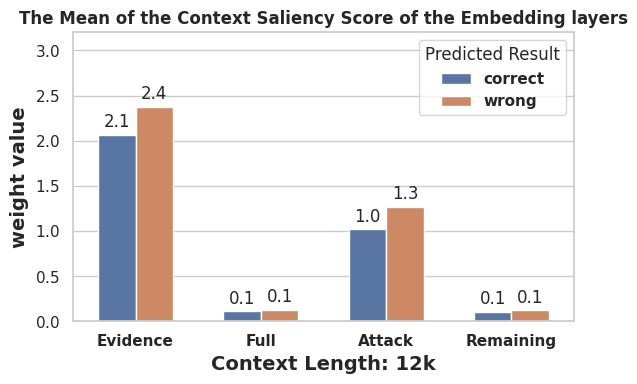

In [112]:


final_scores=[]


for score in [100,0]:
    all_predictions = []
    labels = []

    all_layer_scores = [0, 0, 0, 0]
    sample_numbers = 0
    for file in tqdm(all_files):
        settings = os.path.basename(file).split("_")
        hop, depth = settings[0], settings[1]
        label = hop.split("-")[-1].lower()
        content = auto_read_data(file)
        if content['score'] != score:continue
        sample_numbers += 1
        if content['score'] == 0:
            all_predictions.append(0)
            
        else:
            all_predictions.append(1)
                    
        # print(content['pred_res'], content['score'])
        # print(content[0])
        # break
        # 提取数据
        for i, s in enumerate(content['embedding']['score']):
            all_layer_scores[i] += s
    
    for i in range(len(all_layer_scores)):
        all_layer_scores[i]/= sample_numbers
    print(all_layer_scores,sample_numbers)
    final_scores.append(tuple(all_layer_scores))



import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib.ticker import ScalarFormatter
from matplotlib.patches import FancyBboxPatch
# 示例数据
data = pd.DataFrame({
    'Context Type': ['Evidence', 'Full', 'Attack', 'Remaining'],
    'correct': final_scores[0],
    'wrong': final_scores[1],
})



# 将数据转换为长格式
data_melted = data.melt(id_vars='Context Type', var_name='Predicted Result', value_name='Mean Weight')

# 设置Seaborn主题
sns.set_theme(style="whitegrid")

# 创建分组柱状图
plt.figure(figsize=(6, 4))
bar_plot = sns.barplot(x='Context Type', y='Mean Weight', hue='Predicted Result', data=data_melted,
                        # palette="viridis",
                        # palette = 'whitegrid',
                          width = 0.6)

# # plt.ylim([0.04,0.06])
# for patch in bar_plot.patches:
#     # 获取矩形的位置和尺寸
    
#     # 隐藏原始矩形柱
#     x, y, width, height = patch.get_x(), patch.get_y(), patch.get_width(), patch.get_height()
    
#     # 创建圆角矩形
#     rounded_rect = FancyBboxPatch(
#         (x, y), width, height, 
#         boxstyle="round,pad=0.05,rounding_size=0.05",  # 调整 pad 和 rounding_size
#         edgecolor="blue", 
#         facecolor=patch.get_facecolor(),
#         linewidth=0
#     )
    
#     # 添加到当前的绘图区
#     bar_plot.add_patch(rounded_rect)

# 添加标题和标签
plt.title(f'The Mean of the Context Saliency Score of the Embedding layers', fontsize=12, fontweight='bold')
plt.xlabel(f'Context Length: {context_length}', fontsize=14, fontweight = 'bold')
plt.ylabel('score value', fontsize=14, fontweight = 'bold')
plt.ylim(0,3.2)
# 调整x轴标签的旋转角度

bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontweight='bold', horizontalalignment='center')

# 添加数值标签
cnt = 0
max_h
for p in bar_plot.patches:
    cnt+=1
    f = format(p.get_height(), '.1f')#.rstrip('0').rstrip('.')
    if float(f) == 0.:f = ''
    bar_plot.annotate(f, 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True)) #科学计数法
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0,0))


# 显示图例
# plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
if context_length == '0k':
    loc = 'lower left'
else:
    loc = 'upper right'
plt.legend(title = 'Predicted Result', loc = loc, prop={'weight': 'bold'})
# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

In [13]:
a=torch.randn(1,2,3)
b = torch.tensor([[0, 1]])

a.shape,b.shape

(torch.Size([1, 2, 3]), torch.Size([1, 2]))

In [ ]:
import torch
t = torch.randn(3,8,requires_grad = True)

t.sum().backward()
t.grad

RuntimeError: a view of a leaf Variable that requires grad is being used in an in-place operation.

In [8]:


context_length = "12k"

for score_type in ["Grad", "Weight", "Saliency"]:
    for context_length in ['0k','2k','4k','8k','12k']:
        for hop in [3,4]:

            
            # file_dir = "/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal/Meta-Llama-3.1-8B-Instruct/1900/ce"
            # context_length = "2k"
            # file_dir = f"/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal_max16k/Meta-Llama-3.1-8B-Instruct/{int(context_length[:-1])*1000-100}/ce"
            file_dir = f"/data/zecheng/acl2025/Long-form-reasoning/preliminary/babilong_random5x100/results/gws/Meta-Llama-3.1-8B-Instruct/{max(0, int(context_length[:-1])*1000-100)}/label"
            prefix = f"{hop}-hop*"
            all_files = auto_read_dir(file_dir, file_prefix=prefix)
            i = 0
            all_files = [os.path.join(file_dir, x) for x in all_files]
            
            final_scores=[]


            for score in [100,0]:
                all_predictions = []
                labels = []

                all_layer_scores = [0, 0, 0, 0, 0]
                sample_numbers = 0
                for file in tqdm(all_files):
                    settings = os.path.basename(file).split("_")
                    hop, depth = settings[0], settings[1]
                    label = hop.split("-")[-1].lower()
                    content = auto_read_data(file)
                    if content['score'] != score:continue
                    sample_numbers += 1
                    if content['score'] == 0:
                        all_predictions.append(0)
                        
                    else:
                        all_predictions.append(1)
                                
                    # print(content['pred_res'], content['score'])
                    # print(content[0])
                    # break
                    # 提取数据
                    for i, s in enumerate(content['embedding'][score_type.lower()]['score']):
                        all_layer_scores[i] += s
                
                for i in range(len(all_layer_scores)):
                    all_layer_scores[i]/= sample_numbers
                print(all_layer_scores,sample_numbers)
                final_scores.append(tuple(all_layer_scores))



            import seaborn as sns
            import matplotlib.pyplot as plt
            import pandas as pd
            import numpy as np

            from matplotlib.ticker import ScalarFormatter
            from matplotlib.patches import FancyBboxPatch
            # 示例数据
            data = pd.DataFrame({
                'Context Type': ['Evidence', 'Full', 'Attack', 'Remaining', "Emoji"],
                'correct': final_scores[0],
                'wrong': final_scores[1],
            })



            # 将数据转换为长格式
            data_melted = data.melt(id_vars='Context Type', var_name='Predicted Result', value_name='Mean Weight')

            # 设置Seaborn主题
            sns.set_theme(style="whitegrid")

            # 创建分组柱状图
            plt.figure(figsize=(6, 4))
            bar_plot = sns.barplot(x='Context Type', y='Mean Weight', hue='Predicted Result', data=data_melted,
                                    # palette="viridis",
                                    # palette = 'whitegrid',
                                    width = 0.6)

            # # plt.ylim([0.04,0.06])
            # for patch in bar_plot.patches:
            #     # 获取矩形的位置和尺寸
                
            #     # 隐藏原始矩形柱
            #     x, y, width, height = patch.get_x(), patch.get_y(), patch.get_width(), patch.get_height()
                
            #     # 创建圆角矩形
            #     rounded_rect = FancyBboxPatch(
            #         (x, y), width, height, 
            #         boxstyle="round,pad=0.05,rounding_size=0.05",  # 调整 pad 和 rounding_size
            #         edgecolor="blue", 
            #         facecolor=patch.get_facecolor(),
            #         linewidth=0
            #     )
                
            #     # 添加到当前的绘图区
            #     bar_plot.add_patch(rounded_rect)

            # 添加标题和标签
            plt.title(f'Context {score_type} Score of the Embedding layers', fontsize=12, fontweight='bold')
            plt.xlabel(f'Context Length: {context_length}', fontsize=14, fontweight = 'bold')
            plt.ylabel('score value', fontsize=14, fontweight = 'bold')
            if score_type == "Saliency":
                plt.ylim(0,3.2)
            # 调整x轴标签的旋转角度

            bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontweight='bold', horizontalalignment='center')

            # 添加数值标签

            max_height = 0
            for p in bar_plot.patches:
                max_height = max(max_height, p.get_height())

            bits = 1
            while max_height>=10:
                bits *= 10
                max_height/=10

            cnt = 0
            for p in bar_plot.patches:
                cnt+=1
                f = format(p.get_height()/bits, '.1f')#.rstrip('0').rstrip('.')
                if p.get_height() == 0.:f = ''
                bar_plot.annotate(f, 
                                (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha = 'center', va = 'center', 
                                xytext = (0, 9), 
                                textcoords = 'offset points')

            plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True)) #科学计数法
            plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0,0))


            # 显示图例
            # plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
            if context_length == '0k':
                loc = 'lower left'
            else:
                loc = 'upper right'
            if score_type == "Saliency":
                plt.legend(title = 'Predicted Result', loc = loc, prop={'weight': 'bold'})
            else:
                
                plt.legend(title = 'Predicted Result', prop={'weight': 'bold'})
            # 调整布局
            plt.tight_layout()
            plt.savefig(f"/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/figure/embedding/{'_'.join(file_dir.split('/')[-3:]) + '_' + prefix[:-1] + '-' + score_type }.pdf")
            # 显示图表
            # plt.show()

NameError: name 'auto_read_dir' is not defined